In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Iris-cleaned.csv")
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df.drop(['petal length', 'petal width'],axis=1)
df.head()

,sepal length,sepal width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [4]:
features = df.drop('species', axis=1)
target = df.species
features = (features - features.mean()) / features.std()
features.head()

,sepal length,sepal width
0,-0.897674,1.028611
1,-1.139200,-0.124540
2,-1.380727,0.336720
3,-1.501490,0.106090
4,-1.018437,1.259242



best tree depth=  {'max_depth': 4} test accuracy=  0.77


C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


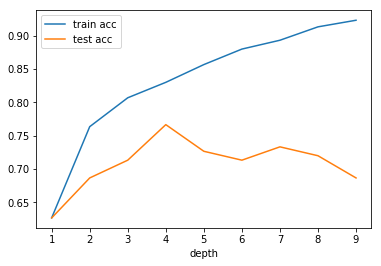

In [5]:
grid = {'max_depth':np.arange(1,10)}

tree = DecisionTreeClassifier()
treeCV = GridSearchCV(tree,param_grid = grid, return_train_score=True)
treeCV.fit(features,target)

print()
print("best tree depth= ", treeCV.best_params_, "test accuracy= ", treeCV.best_score_.round(2))

performance = pd.DataFrame()
performance['depth'] = grid['max_depth']
performance['train acc'] = treeCV.cv_results_['mean_train_score']
performance['test acc'] = treeCV.cv_results_['mean_test_score']

ax1 = performance.plot.line(x="depth", y="train acc")
performance.plot.line(x='depth',y='test acc',ax=ax1)

In [6]:
knn = KNeighborsClassifier()

In [7]:
knn.fit(features,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
results = cross_validate(knn,features,target,cv=3)

In [9]:
results['test_score'].mean()

0.7275326797385621

train accuracy = 0.808   test accuracy = 0.733


Text(0.5, 1.0, 'test set')

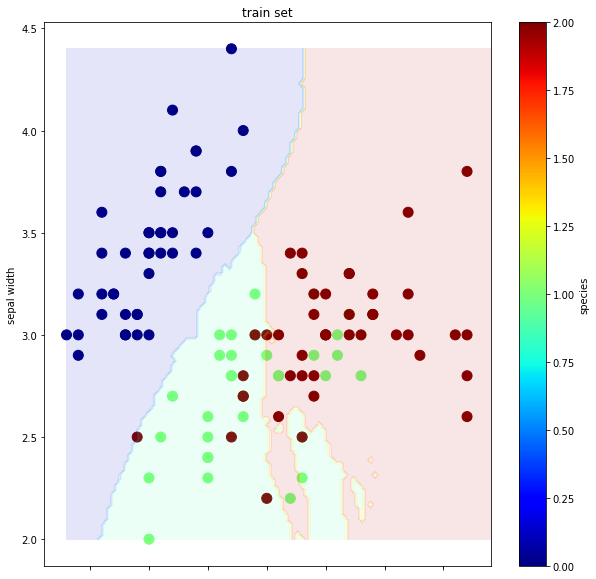

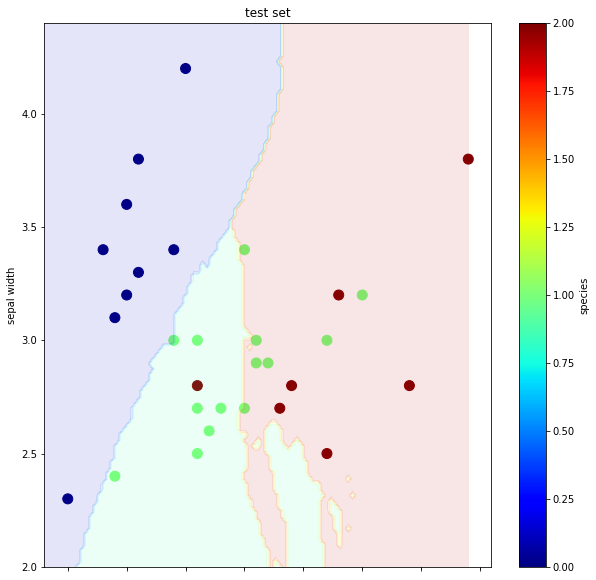

In [11]:
hyper_parm = 17
N = 100
alpha = 0.1
#cmap = 'rainbow'
cmap = 'jet'

# select classifier
clf = KNeighborsClassifier(n_neighbors=hyper_parm)

# create 2D grid of points
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
XX1,XX2 = np.meshgrid(
    np.linspace(X1.min(),X1.max(),N),
    np.linspace(X2.min(),X2.max(),N))

# integer code categories
df.iloc[:,2] = LabelEncoder().fit_transform(df.iloc[:,2])

# train-test split
df_test  = df.sample(frac=0.2)
df_train = df.drop(df_test.index)
features_train = df_train.iloc[:,[0,1]]
target_train   = df_train.iloc[:,2]
features_test  = df_test.iloc[:,[0,1]]
target_test    = df_test.iloc[:,2]

# train classifier
clf.fit(features_train,target_train)

# compute train and test score
acc_train = clf.score(features_train,target_train)
acc_test  = clf.score(features_test,target_test)
print('train accuracy =',acc_train.round(3),'  test accuracy =',acc_test.round(3))

# predict targets on 2D grid
Y = clf.predict(np.stack([XX1.ravel(),XX2.ravel()],axis=1))
YY = Y.reshape(XX1.shape)

# plot training set
ax1 = df_train.plot.scatter(x=0,y=1,c=2,cmap=cmap,s=100,figsize=(10,10))
ax1.contourf(XX1,XX2,YY,alpha=alpha,cmap=cmap)
plt.title('train set')

# plot test set
ax2 = df_test.plot.scatter(x=0,y=1,c=2,cmap=cmap,s=100,figsize=(10,10))
ax2.contourf(XX1,XX2,YY,alpha=alpha,cmap=cmap)
plt.title('test set')